In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [14]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [3]:
male = pd.read_csv("Ansur_Male.csv")
female = pd.read_csv("Ansur_Female.csv")
ansur_df = pd.concat([male, female])
ansur_df[:3]

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal


### Train Test Split

In [4]:
non_numeric = ["BMI_class", "Height_class", "Component", "Branch"]

ansur_df = ansur_df.drop(non_numeric, axis = 1)

In [5]:
# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis = 1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size =0.3)

### Fitting and testing the model

In [6]:
# Create an instance of the Support Vector Classification class
svc = SVC(gamma = 'auto')

# Fit the model to the training data
svc.fit(X_train, y_train)

# Prediction
y_pred = svc.predict(X_test)
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
comparison[:3]

,Actual,Predicted
281,Male,Male
3068,Male,Male
1919,Male,Male


In [7]:
score = accuracy_score(y_test, y_pred)
print("Accuracy Score", score)

Accuracy Score 0.656781987918726


### Accuracy after dimensionality reduction

In [8]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3)

svc = SVC(gamma = 'auto')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[:3]

,Actual,Predicted
2815,Male,Female
1434,Female,Female
2811,Male,Male


In [9]:
score = accuracy_score(y_test, y_pred)
print("Accuracy Score", score)

Accuracy Score 0.9231191652937946


### Finding a good variance threshold

In [10]:
head_df = ansur_df[['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']]
head_df['n_hairs'] = 10000

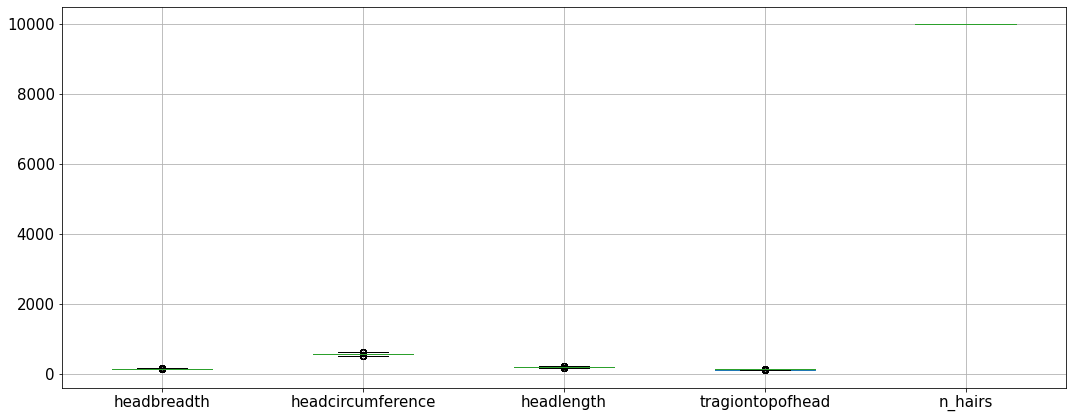

In [11]:
# Create the boxplot
plt.figure(figsize = (18, 7))
head_df.boxplot()
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

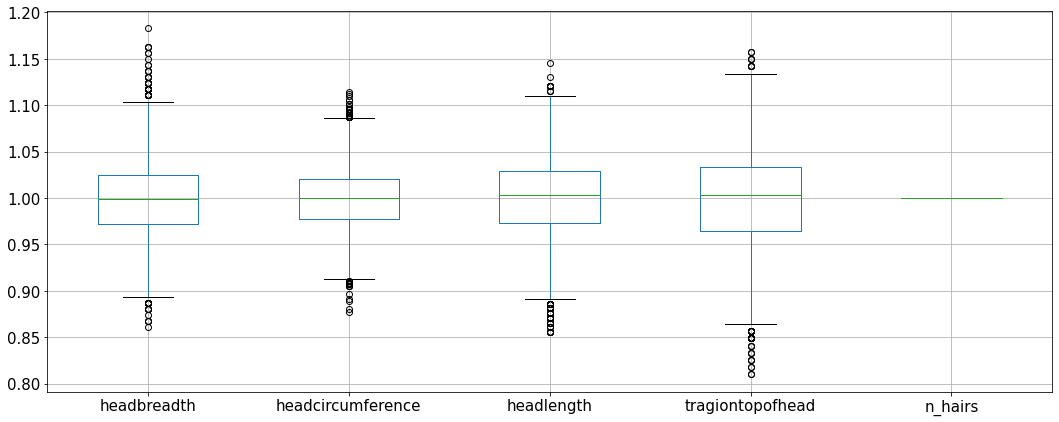

In [12]:
# Normalize the data
normalized_df = head_df / head_df.mean()

plt.figure(figsize = (18, 7))
normalized_df.boxplot()
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [13]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          0.001679
headcircumference    0.001030
headlength           0.001868
tragiontopofhead     0.002640
n_hairs              0.000000
dtype: float64


### Features with low variance

In [18]:
# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold = 0.001)

# Normalize Features
head_dfn = head_df / head_df.mean()

# Fit the selector to normalized head_dfn
sel.fit(head_dfn / head_dfn.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_dfn.loc[:, mask]

reduced_df[:3]

,headbreadth,headcircumference,headlength,tragiontopofhead
0,0.985657,1.022744,1.049228,1.080097
1,0.959373,0.996430,1.023761,0.925797
2,0.972515,1.005201,1.028854,0.964372


### Removing features with many missing values

In [19]:
school_df = pd.read_csv("schools.csv")
school_df[:3]

,x,y,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,csp_sch_id,...,sch_name,sch_label,sch_type,shared,complex,label,tlt,pl,point_x,point_y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,...,Guild Elementary,Guild,ES,NaN,NaN,52,3,Grace,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,...,Kennedy Patrick Elem,PJ Kennedy,ES,NaN,NaN,72,3,Grace,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,...,Otis Elementary,Otis,ES,NaN,NaN,106,3,Grace,782112.823908,2.962122e+06


In [21]:
school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x           131 non-null    float64
 1   y           131 non-null    float64
 2   objectid_1  131 non-null    int64  
 3   objectid    131 non-null    int64  
 4   bldg_id     131 non-null    int64  
 5   bldg_name   131 non-null    object 
 6   address     131 non-null    object 
 7   city        131 non-null    object 
 8   zipcode     131 non-null    int64  
 9   csp_sch_id  131 non-null    int64  
 10  sch_id      131 non-null    int64  
 11  sch_name    131 non-null    object 
 12  sch_label   131 non-null    object 
 13  sch_type    131 non-null    object 
 14  shared      16 non-null     object 
 15  complex     2 non-null      object 
 16  label       131 non-null    int64  
 17  tlt         131 non-null    int64  
 18  pl          131 non-null    object 
 19  point_x     131 non-null    f

In [22]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]
reduced_df[:3]

,x,y,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,csp_sch_id,sch_id,sch_name,sch_label,sch_type,label,tlt,pl,point_x,point_y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,4061,Guild Elementary,Guild,ES,52,3,Grace,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,4541,Kennedy Patrick Elem,PJ Kennedy,ES,72,3,Grace,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,4322,Otis Elementary,Otis,ES,106,3,Grace,782112.823908,2.962122e+06


### Visualizing the correlation matrix

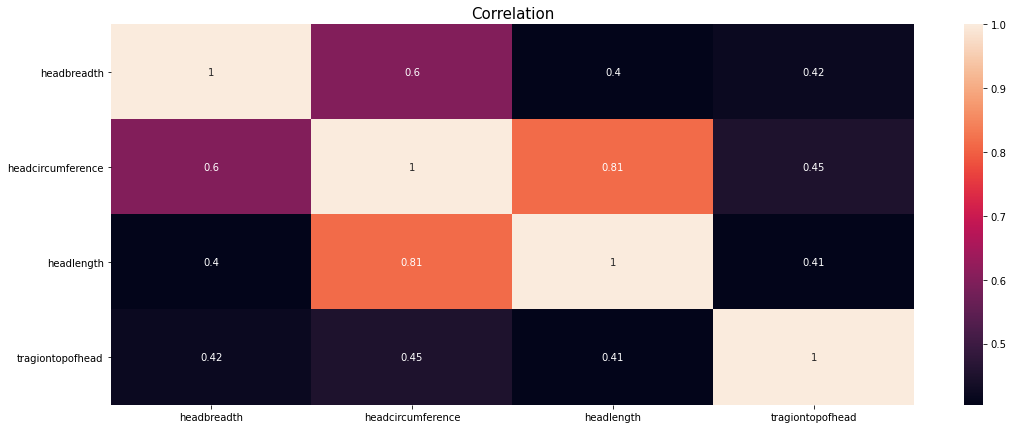

In [26]:
df = ansur_df[['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']]

# Bivariate Analysis
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, annot = True)
plt.title("Correlation", size = 15)
plt.show()

### Filtering out highly correlated features

In [30]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis = 1)
reduced_df[:3]

,Gender,anklecircumference,balloffootcircumference,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,...,verticaltrunkcircumferenceusa,waistbacklength,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,Male,222,253,401,369,274,493,71,319,291,...,1700,501,240,440,1054,175,853,81.5,1.776,25.838761
1,Male,220,245,394,338,257,479,67,344,320,...,1627,432,225,371,1054,167,815,72.6,1.702,25.062103
2,Male,230,256,427,408,261,544,75,345,330,...,1678,472,255,411,1041,180,831,92.9,1.735,30.861480


### Silly Causation

In [32]:
weird_df = pd.DataFrame([[421.0, 728.3], [465.0, 753.9], [494.0, 768.8], [538.0, 780.1], [430.0, 763.7], [530.0, 788.5], [511.0, 782.0], [600.0, 787.2], [582.0, 806.4], [605.0, 806.2], [603.0, 798.9]], columns = ['pool_drownings', 'nuclear_energy'])
weird_df[:3]

,pool_drownings,nuclear_energy
0,421.0,728.3
1,465.0,753.9
2,494.0,768.8


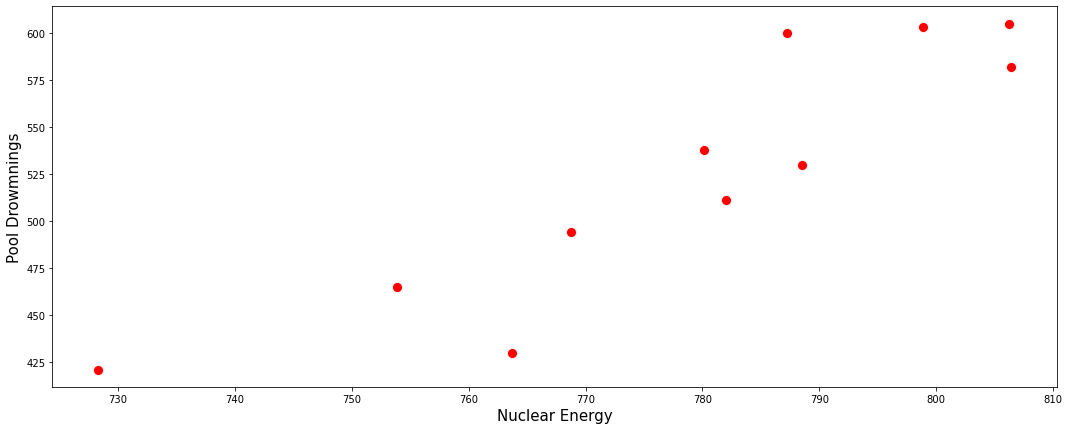

In [36]:
# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
plt.figure(figsize = (18, 7))
sns.scatterplot(x='nuclear_energy',
                y='pool_drownings',
                data=weird_df,
                s = 100,
                color = "red")
plt.xlabel("Nuclear Energy", size = 15)
plt.ylabel("Pool Drowmnings", size = 15)
plt.show()